In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

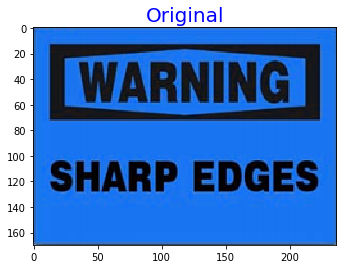

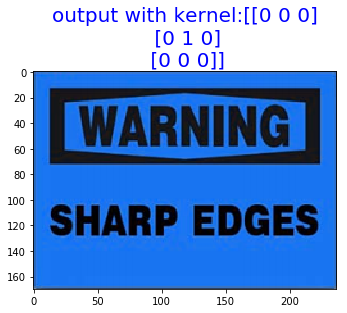

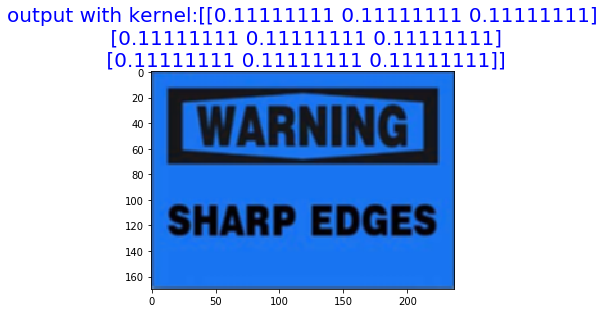

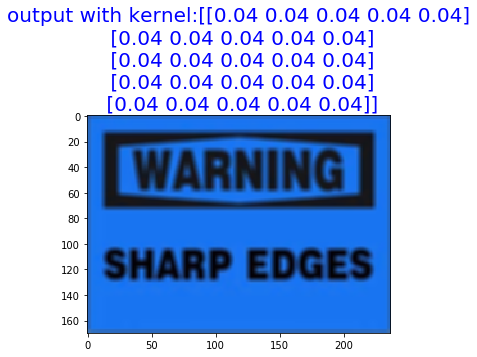

In [4]:
#kernel conv2D
img = cv2.imread('./images/sign_input.png')
row, col = img.shape[:-1]

plt.imshow(img)
plt.title('Original', fontsize=20, color='b')
plt.show()

def kernel(image, kernel_matrix, offset):
    output = cv2.filter2D(img, -1, kernel_matrix) + offset
    
    cv2.imshow('output image', output)
    cv2.waitKey()
    
    plt.imshow(output)
    plt.title('output with kernel:{}'.format(str(kernel_matrix)), fontsize=20, color='b')
    plt.show()

kernel_identity = np.array([[0,0,0], [0,1,0], [0,0,0]]) 
kernel_3x3 = np.ones((3,3), np.float32) / np.ones((3,3), np.float32).sum()
kernel_5x5 = np.ones((5,5), np.float32) / np.ones((5,5), np.float32).sum()

kernel(img, kernel_identity,0)
kernel(img, kernel_3x3,0)
kernel(img, kernel_5x5,0)

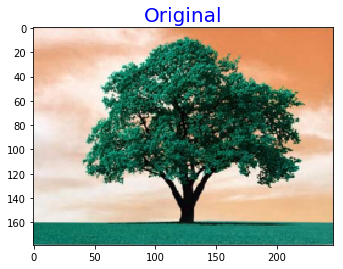

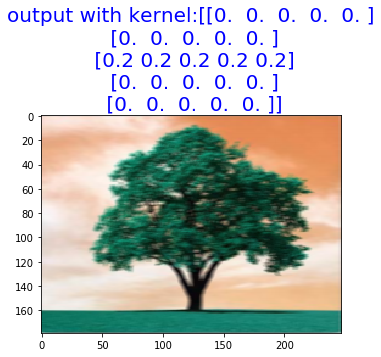

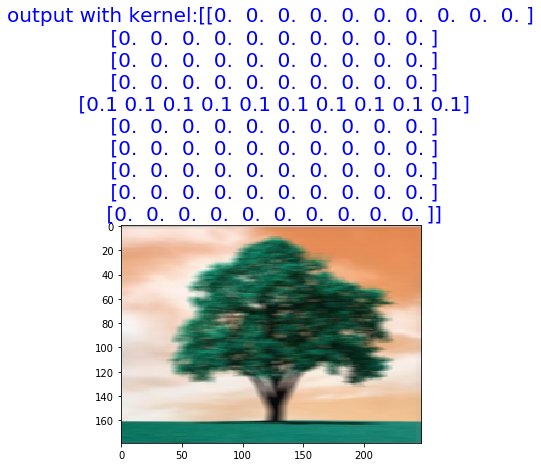

In [5]:
#Motion blur
img = cv2.imread('./images/tree_input.png')

plt.imshow(img)
plt.title('Original', fontsize=20, color='b')
plt.show()

def motion_blur(size):
    matrix = np.zeros((size, size))
    matrix[int((size-1)/2), :] = np.ones(size)/ np.ones(size).sum()
    return matrix

motion_blur10 = motion_blur(10)
motion_blur5 = motion_blur(5)

kernel(img, motion_blur5,0)
kernel(img, motion_blur10,0)

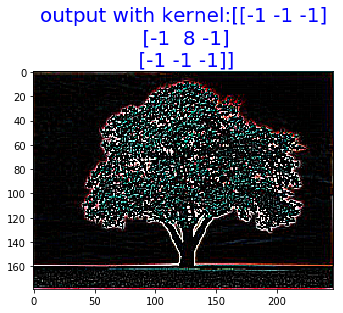

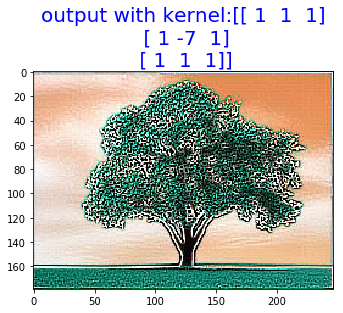

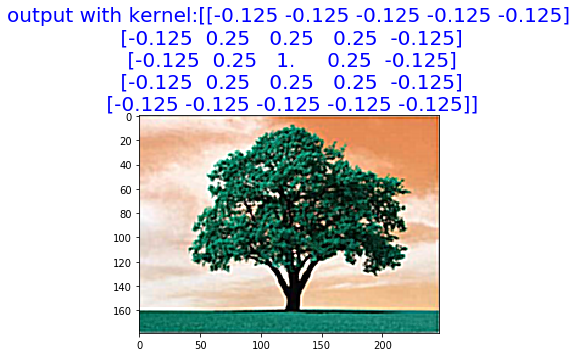

In [6]:
#sharpening

sharpening = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]) 
excessive_sharpening = np.array([[1,1,1], [1,-7,1], [1,1,1]]) 
edge_enhancement = np.array([[-1,-1,-1,-1,-1], 
                             [-1,2,2,2,-1], 
                             [-1,2,8,2,-1], 
                             [-1,2,2,2,-1], 
                             [-1,-1,-1,-1,-1]]) / 8.0 

kernel(img, sharpening,0)
kernel(img, excessive_sharpening,0)
kernel(img, edge_enhancement,0)

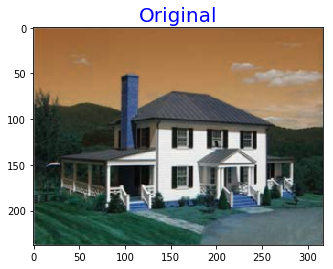

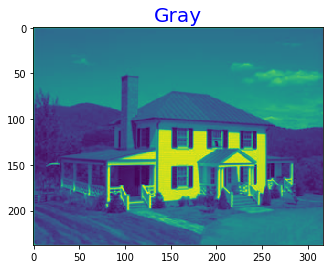

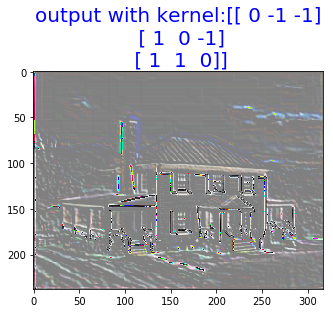

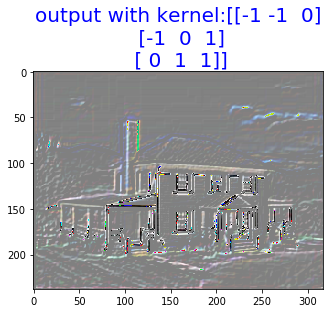

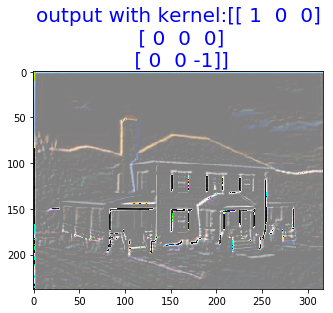

In [7]:
#Embossing
img = cv2.imread('./images/house_input.png')

plt.imshow(img)
plt.title('Original', fontsize=20, color='b')
plt.show()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray)
plt.title('Gray', fontsize=20, color='b')
plt.show()

south_west = np.array([[0,-1,-1], 
                            [1,0,-1], 
                            [1,1,0]]) 
south_east = np.array([[-1,-1,0], 
                            [-1,0,1], 
                            [0,1,1]]) 
north_west = np.array([[1,0,0], 
                            [0,0,0], 
                            [0,0,-1]])

kernel(img_gray, south_west, 128)
kernel(img_gray, south_east, 128)
kernel(img_gray, north_west, 128)

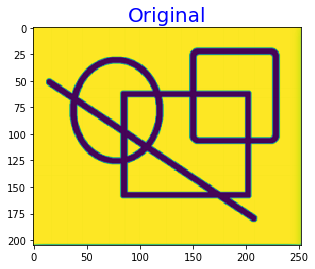

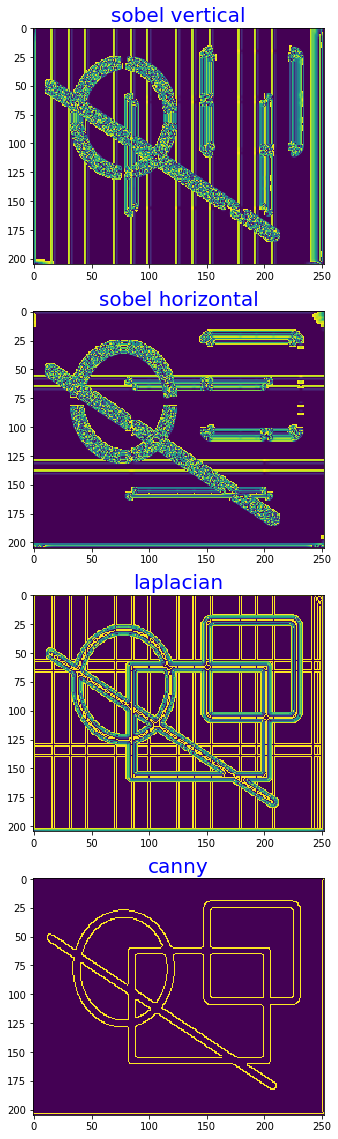

In [19]:
#Edge detection

img = cv2.imread('./images/geometrics_input.png', cv2.IMREAD_GRAYSCALE)

row, col = img.shape

plt.imshow(img)
plt.title('Original', fontsize=20, color='b')
plt.show()

sobel_vertical = cv2.Sobel(img, cv2.CV_64F,1,0, ksize=5).astype('uint8')
sobel_horizontal = cv2.Sobel(img, cv2.CV_64F,0,1, ksize=5).astype('uint8')
laplacian = cv2.Laplacian(img, cv2.CV_64F).astype('uint8')
canny = cv2.Canny(img, 50, 240).astype('uint8')

cv2.imshow('sobel vertical', sobel_vertical)
cv2.imshow('sobel horizontal', sobel_horizontal)
cv2.imshow('laplacian', laplacian)
cv2.imshow('canny', canny)
cv2.waitKey()

fig, ax = plt.subplots(4,1, figsize=(40,20))
ax[0].imshow(sobel_vertical)
ax[0].set_title('sobel vertical', fontsize=20, color='b')

ax[1].imshow(sobel_horizontal)
ax[1].set_title('sobel horizontal', fontsize=20, color='b')

ax[2].imshow(laplacian)
ax[2].set_title('laplacian', fontsize=20, color='b')

ax[3].imshow(canny)
ax[3].set_title('canny', fontsize=20, color='b')

plt.show()

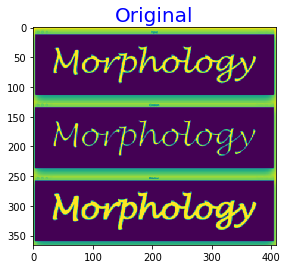

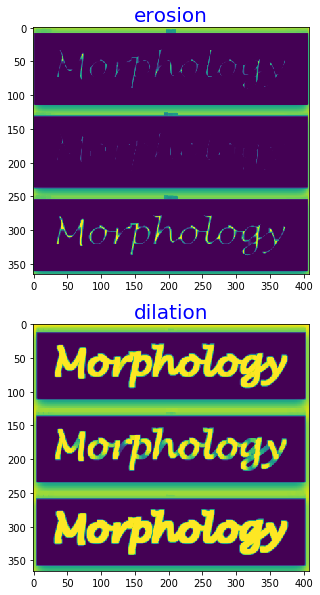

In [25]:
#erosion dilation

img = cv2.imread('./images/text_input.png', 0)

row, col = img.shape

plt.imshow(img)
plt.title('Original', fontsize=20, color='b')
plt.show()

kernel = np.ones((5,5), np.uint8)
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)

cv2.imshow('erosion', img_erosion)
cv2.imshow('dilation', img_dilation)

cv2.waitKey()

fig, ax = plt.subplots(2,1, figsize=(20,10))
ax[0].imshow(img_erosion)
ax[0].set_title('erosion', fontsize=20, color='b')

ax[1].imshow(img_dilation)
ax[1].set_title('dilation', fontsize=20, color='b')

plt.show()

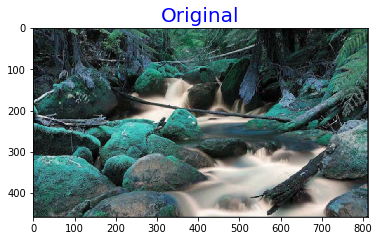

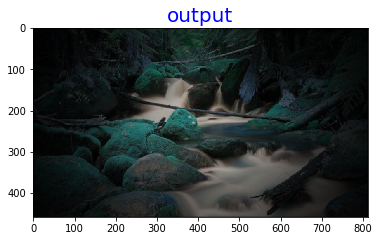

In [31]:
#vignette filter

img = cv2.imread('./images/input.jpg')
row, col = img.shape[:-1]

plt.imshow(img)
plt.title('Original', fontsize=20, color='b')
plt.show()

kernel_x = cv2.getGaussianKernel(col, 200)
kernel_y = cv2.getGaussianKernel(row, 200)
kernel = kernel_y * kernel_x.T
mask = 255*kernel/np.linalg.norm(kernel)
output = np.copy(img)

for i in range(3):
    output[:,:,i] = output[:,:,i]*mask
    
cv2.imshow('output', output)

cv2.waitKey()

plt.imshow(output)
plt.title('output', fontsize=20, color='b')
plt.show()

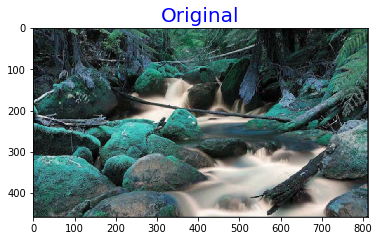

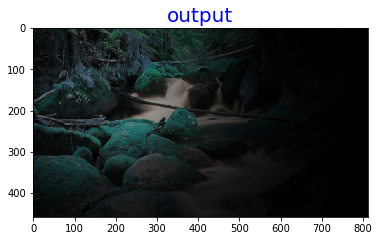

In [32]:
#vignette gaussian

img = cv2.imread('./images/input.jpg')
row, col = img.shape[:-1]

plt.imshow(img)
plt.title('Original', fontsize=20, color='b')
plt.show()

kernel_x = cv2.getGaussianKernel(int(1.5*col), 200)
kernel_y = cv2.getGaussianKernel(int(1.5*row), 200)
kernel = kernel_y * kernel_x.T
mask = 255*kernel/np.linalg.norm(kernel)
mask = mask[int(0.5*row):, int(0.5*col):]
output = np.copy(img)

for i in range(3):
    output[:,:,i] = output[:,:,i]*mask
    
cv2.imshow('output', output)

cv2.waitKey()

plt.imshow(output)
plt.title('output', fontsize=20, color='b')
plt.show()

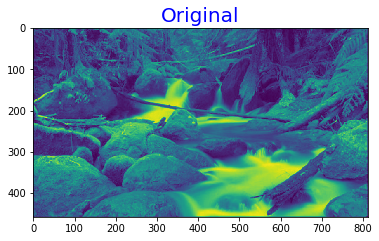

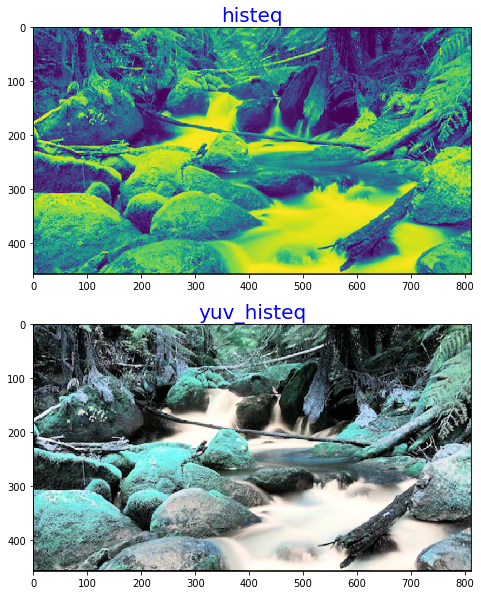

In [40]:
#enhancing contrast

img = cv2.imread('./images/input.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

plt.imshow(img)
plt.title('Original', fontsize=20, color='b')
plt.show()

histeq = cv2.equalizeHist(img)

cv2.imshow('histeq', histeq)
cv2.imshow('yuv_histeq', img_output)
cv2.waitKey()

fig, ax = plt.subplots(2,1, figsize=(20,10))
ax[0].imshow(histeq)
ax[0].set_title('histeq', fontsize=20, color='b')

ax[1].imshow(img_output)
ax[1].set_title('yuv_histeq', fontsize=20, color='b')

plt.show()

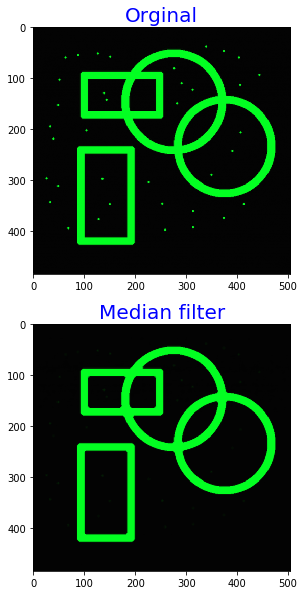

In [41]:
#medianBlur

img = cv2.imread('images/green_dots.png') 
output = cv2.medianBlur(img, ksize=7) 
cv2.imshow('Input', img) 
cv2.imshow('Median filter', output) 
cv2.waitKey()

fig, ax = plt.subplots(2,1, figsize=(20,10))
ax[0].imshow(img)
ax[0].set_title('Orginal', fontsize=20, color='b')

ax[1].imshow(output)
ax[1].set_title('Median filter', fontsize=20, color='b')

plt.show()

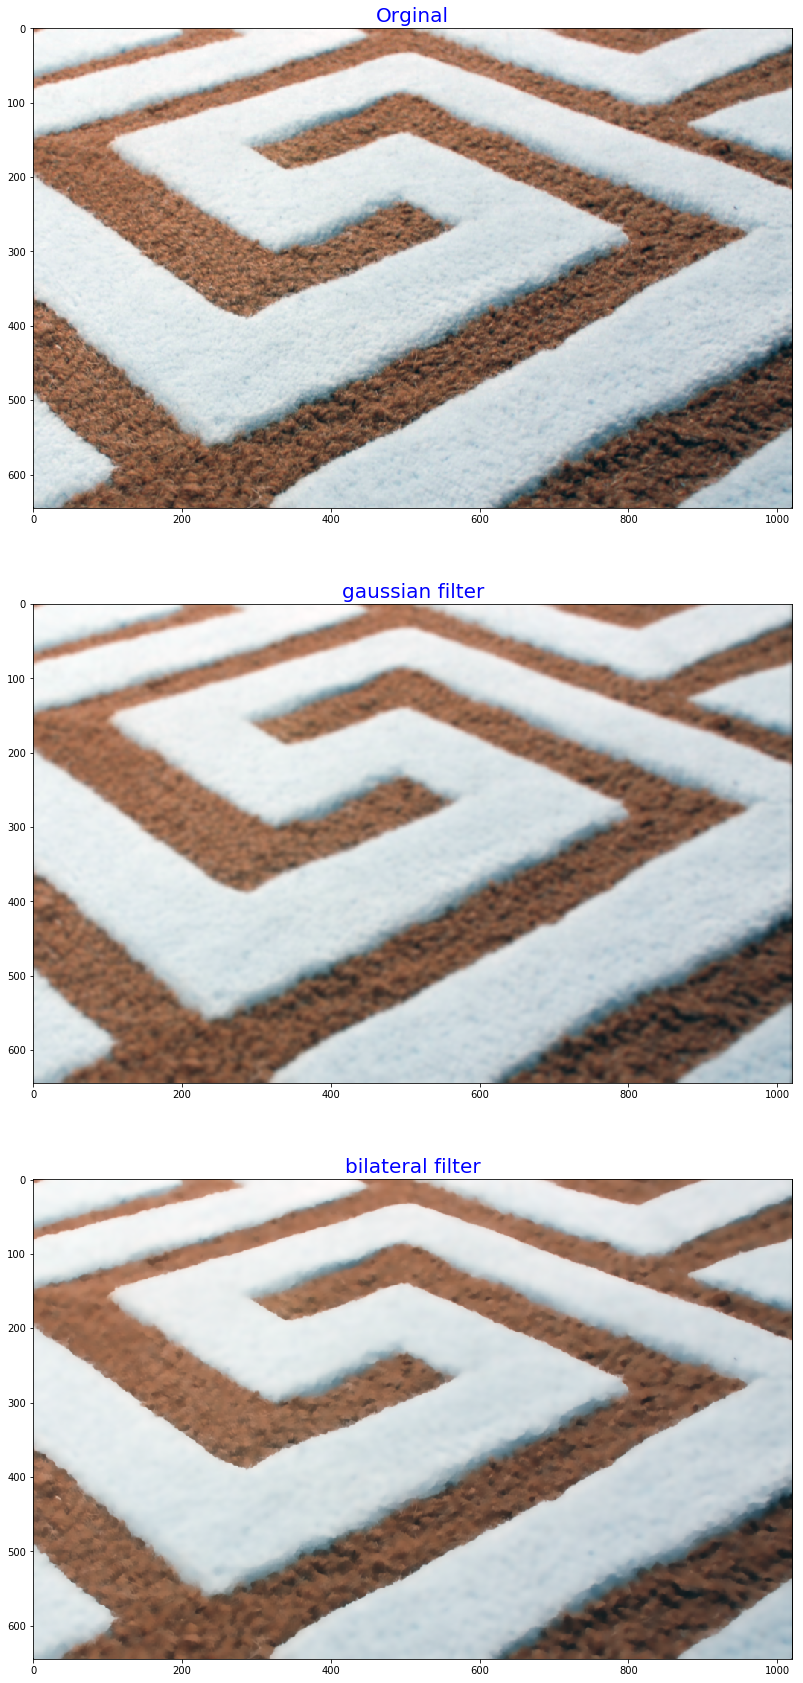

In [45]:
#gaussian + bilatera filter

img = cv2.imread('images/blue_carpet.png') 
gaussian = cv2.GaussianBlur(img, (13,13),0)
bilateral = cv2.bilateralFilter(img, 13, 70, 50)

cv2.imshow('Input', img) 
cv2.imshow('Gaussian filter', gaussian) 
cv2.imshow('bilateral filter', bilateral) 
cv2.waitKey()

fig, ax = plt.subplots(3,1, figsize=(50,30))
ax[0].imshow(img)
ax[0].set_title('Orginal', fontsize=20, color='b')

ax[1].imshow(gaussian)
ax[1].set_title('gaussian filter', fontsize=20, color='b')

ax[2].imshow(bilateral)
ax[2].set_title('bilateral filter', fontsize=20, color='b')

plt.show()